In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib notebook

In [4]:
import platform
import matplotlib.font_manager as fm

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

In [5]:
import sys
print(sys.stdin.encoding)
print(sys.stdout.encoding)

utf-8
UTF-8


In [5]:
df_2005 =pd.read_csv("./data/공공자전거 이용정보(시간대별)_19.12_20.056.csv" ,encoding='cp949')
df_2005

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,0,504,504. 신자초교입구교차로,정기권,NaN,~10대,3,74.84,0.67,2880.0,17
1,2019-12-01,0,1029,1029. 롯데 시네마,정기권,NaN,~10대,1,246.71,2.06,8900.0,45
2,2019-12-01,0,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,NaN,~10대,1,25.60,0.23,1010.0,12
3,2019-12-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,NaN,~10대,1,78.59,0.73,3150.0,17
4,2019-12-01,0,1528,1528. 삼각산동 주민센터,정기권,NaN,~10대,1,26.15,0.22,930.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6894861,2020-05-31,23,1610,1610. 화랑대역 2번출구 앞,일일권,M,30대,1,231.20,1.65,7120.0,34
6894862,2020-05-31,23,2318,2318. 삼성중앙역4번출구(문화센터더 리빌),일일권,M,30대,1,175.53,1.37,5910.0,40
6894863,2020-05-31,23,2329,2329. 르네상스호텔사거리 역삼지하보도 2번출구,일일권,M,30대,1,0.00,0.00,0.0,20
6894864,2020-05-31,23,1450,1450. 화랑대역 7번출구,일일권,M,40대,1,0.00,0.00,0.0,5


In [6]:
import glob
all_data = glob.glob('./data/공공자전거 이용정보(시간대별)_*')
all_data

['./data/공공자전거 이용정보(시간대별)_21.01.csv',
 './data/공공자전거 이용정보(시간대별)_19.12_20.056.csv',
 './data/공공자전거 이용정보(시간대별)_20.09.csv',
 './data/공공자전거 이용정보(시간대별)_20.08.csv',
 './data/공공자전거 이용정보(시간대별)_20.11.csv',
 './data/공공자전거 이용정보(시간대별)_20.10.csv',
 './data/공공자전거 이용정보(시간대별)_20.12.csv',
 './data/공공자전거 이용정보(시간대별)_20.06.csv',
 './data/공공자전거 이용정보(시간대별)_20.07.csv']

In [7]:
df2101 = pd.read_csv(all_data[0], index_col=False, encoding='cp949', parse_dates=[0])
df2005 = pd.read_csv(all_data[1], index_col=False, encoding='cp949', parse_dates=[0])
df2009 = pd.read_csv(all_data[2], index_col=False, encoding='cp949', parse_dates=[0])
df2008 = pd.read_csv(all_data[3], index_col=False, encoding='cp949', parse_dates=[0])
df2011 = pd.read_csv(all_data[4], index_col=False, encoding='cp949', parse_dates=[0])
df2010 = pd.read_csv(all_data[5], index_col=False, encoding='cp949', parse_dates=[0])
df2012 = pd.read_csv(all_data[6], index_col=False, encoding='cp949', parse_dates=[0])
df2006 = pd.read_csv(all_data[7], index_col=False, encoding='cp949', parse_dates=[0])
df2007 = pd.read_csv(all_data[8], index_col=False, encoding='cp949', parse_dates=[0])

In [8]:
df = pd.concat([df2005,df2006,df2007,df2008,df2009,df2010,df2011,df2012,df2101])
df.shape

(20521848, 12)

In [9]:
df.reset_index(drop=True, inplace=True)
df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,0,504,504. 신자초교입구교차로,정기권,NaN,~10대,3,74.84,0.67,2880.00,17
1,2019-12-01,0,1029,1029. 롯데 시네마,정기권,NaN,~10대,1,246.71,2.06,8900.00,45
2,2019-12-01,0,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,NaN,~10대,1,25.60,0.23,1010.00,12
3,2019-12-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,NaN,~10대,1,78.59,0.73,3150.00,17
4,2019-12-01,0,1528,1528. 삼각산동 주민센터,정기권,NaN,~10대,1,26.15,0.22,930.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
20521843,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,NaN,~10대,5,916.66,8.66,37335.95,219
20521844,2021-01-31,23,3549,3549.건영아파트 앞,단체권,NaN,20대,2,492.87,4.51,19447.10,133
20521845,2021-01-31,23,248,248. 초원아파트 앞,단체권,NaN,20대,2,348.43,2.91,12569.64,90
20521846,2021-01-31,23,131,131. 증산2교,단체권,NaN,20대,2,98.10,0.77,3302.87,20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20521848 entries, 0 to 20521847
Data columns (total 12 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    int64         
 2   대여소번호   int64         
 3   대여소명    object        
 4   대여구분코드  object        
 5   성별      object        
 6   연령대코드   object        
 7   이용건수    int64         
 8   운동량     object        
 9   탄소량     object        
 10  이동거리    float64       
 11  사용시간    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.8+ GB


In [11]:
df.isnull().sum()

대여일자             0
대여시간             0
대여소번호            0
대여소명             0
대여구분코드           0
성별        10229315
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리             0
사용시간             0
dtype: int64

In [12]:
df = df.drop('성별',axis=1)
df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,0,504,504. 신자초교입구교차로,정기권,~10대,3,74.84,0.67,2880.00,17
1,2019-12-01,0,1029,1029. 롯데 시네마,정기권,~10대,1,246.71,2.06,8900.00,45
2,2019-12-01,0,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,~10대,1,25.60,0.23,1010.00,12
3,2019-12-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,~10대,1,78.59,0.73,3150.00,17
4,2019-12-01,0,1528,1528. 삼각산동 주민센터,정기권,~10대,1,26.15,0.22,930.00,5
...,...,...,...,...,...,...,...,...,...,...,...
20521843,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,~10대,5,916.66,8.66,37335.95,219
20521844,2021-01-31,23,3549,3549.건영아파트 앞,단체권,20대,2,492.87,4.51,19447.10,133
20521845,2021-01-31,23,248,248. 초원아파트 앞,단체권,20대,2,348.43,2.91,12569.64,90
20521846,2021-01-31,23,131,131. 증산2교,단체권,20대,2,98.10,0.77,3302.87,20


In [13]:
df.insert(1,'년',df['대여일자'].dt.year)
df.insert(2,'월',df['대여일자'].dt.month)
df.insert(3,'일',df['대여일자'].dt.day)
df

,대여일자,년,월,일,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,2019,12,1,0,504,504. 신자초교입구교차로,정기권,~10대,3,74.84,0.67,2880.00,17
1,2019-12-01,2019,12,1,0,1029,1029. 롯데 시네마,정기권,~10대,1,246.71,2.06,8900.00,45
2,2019-12-01,2019,12,1,0,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,~10대,1,25.60,0.23,1010.00,12
3,2019-12-01,2019,12,1,0,512,512. 뚝섬역 1번 출구 옆,정기권,~10대,1,78.59,0.73,3150.00,17
4,2019-12-01,2019,12,1,0,1528,1528. 삼각산동 주민센터,정기권,~10대,1,26.15,0.22,930.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20521843,2021-01-31,2021,1,31,23,207,207. 여의나루역 1번출구 앞,단체권,~10대,5,916.66,8.66,37335.95,219
20521844,2021-01-31,2021,1,31,23,3549,3549.건영아파트 앞,단체권,20대,2,492.87,4.51,19447.10,133
20521845,2021-01-31,2021,1,31,23,248,248. 초원아파트 앞,단체권,20대,2,348.43,2.91,12569.64,90
20521846,2021-01-31,2021,1,31,23,131,131. 증산2교,단체권,20대,2,98.10,0.77,3302.87,20


In [14]:
df.shape

(20521848, 14)

In [15]:
df['대여소명'].unique()

array(['504. 신자초교입구교차로', '1029. 롯데 시네마', '1153. 발산역 1번, 9번 인근 대여소', ...,
       '3863. 동일로58길 입구', '4607. 국립중앙박물관 -용산가족공원 앞',
       '3878. 장로회신학대학교 주기철 기념관'], dtype=object)

In [16]:
df_hanriver = df[df['대여소명'].str.contains
('하늘공원|선유도역|마포구민체육센터|망원2빗물펌프장|여의나루역|여의도역|국회의사당역|노들역|노들섬|한강트럼프월드|아크로리버뷰|신반포역|고속터미널역|뚝섬유원지역|몽촌토성역|천호역|암사동선사유적지')]
df_hanriver['대여소명'].unique()

array(['2219. 고속터미널역 8-1번, 8-2번 출구 사이', '1268. 몽촌토성역 1번출구 옆',
       '1009. 천호역4번출구(현대백화점)', '204. 국회의사당역 5번출구 옆', '207. 여의나루역 1번출구 앞',
       '2213. 고속터미널역 5번출구 앞', '212. 여의도역 1번출구 옆', '182. 망원2빗물펌프장 앞',
       '502. 뚝섬유원지역 1번출구 앞', '2002. 노들역 1번출구', '2217.아크로리버뷰 부지 앞',
       '228. 선유도역 3번출구 앞', '211. 여의도역 4번출구 옆', '1264. 천호역 10번 출구 앞',
       '152. 마포구민체육센터 앞', '2214. 신반포역 2번출구 앞', '203. 국회의사당역 3번출구 옆',
       '440. 하늘공원 입구', '870.노들섬 서측 앞', '869.노들섬 동측 앞', '2077.노들역 3번출구',
       '2535.신반포역 3번출구 뒤', '4605. 노들섬 다목적홀(동쪽) 숲, 앞', '4619. 한강트럼프월드3차 앞'],
      dtype=object)

In [17]:
df_hanriver.reset_index(drop=True,inplace=True)
df_hanriver

,대여일자,년,월,일,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,2019,12,1,0,2219,"2219. 고속터미널역 8-1번, 8-2번 출구 사이",정기권,~10대,1,200.34,1.73,7440.00,47
1,2019-12-01,2019,12,1,0,1268,1268. 몽촌토성역 1번출구 옆,정기권,20대,1,39.47,0.41,1780.00,16
2,2019-12-01,2019,12,1,0,1009,1009. 천호역4번출구(현대백화점),정기권,20대,2,347.37,2.39,10320.00,61
3,2019-12-01,2019,12,1,0,204,204. 국회의사당역 5번출구 옆,정기권,20대,1,110.42,1.00,4290.00,19
4,2019-12-01,2019,12,1,0,207,207. 여의나루역 1번출구 앞,정기권,20대,1,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505227,2021-01-31,2021,1,31,23,207,207. 여의나루역 1번출구 앞,일일권,~10대,1,0.00,0.00,0.00,43
505228,2021-01-31,2021,1,31,23,152,152. 마포구민체육센터 앞,일일권,20대,1,114.94,1.50,6450.00,43
505229,2021-01-31,2021,1,31,23,4619,4619. 한강트럼프월드3차 앞,일일권,20대,2,282.84,4.11,17707.58,138
505230,2021-01-31,2021,1,31,23,207,207. 여의나루역 1번출구 앞,일일권,30대,1,250.30,1.61,6945.89,38


In [18]:
df_hanriver['대여소명'] = df_hanriver['대여소명'].str.split('.').str[1]
df_hanriver

,대여일자,년,월,일,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,2019,12,1,0,2219,"고속터미널역 8-1번, 8-2번 출구 사이",정기권,~10대,1,200.34,1.73,7440.00,47
1,2019-12-01,2019,12,1,0,1268,몽촌토성역 1번출구 옆,정기권,20대,1,39.47,0.41,1780.00,16
2,2019-12-01,2019,12,1,0,1009,천호역4번출구(현대백화점),정기권,20대,2,347.37,2.39,10320.00,61
3,2019-12-01,2019,12,1,0,204,국회의사당역 5번출구 옆,정기권,20대,1,110.42,1.00,4290.00,19
4,2019-12-01,2019,12,1,0,207,여의나루역 1번출구 앞,정기권,20대,1,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505227,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,~10대,1,0.00,0.00,0.00,43
505228,2021-01-31,2021,1,31,23,152,마포구민체육센터 앞,일일권,20대,1,114.94,1.50,6450.00,43
505229,2021-01-31,2021,1,31,23,4619,한강트럼프월드3차 앞,일일권,20대,2,282.84,4.11,17707.58,138
505230,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,30대,1,250.30,1.61,6945.89,38


In [19]:
df_hanriver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505232 entries, 0 to 505231
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여일자    505232 non-null  datetime64[ns]
 1   년       505232 non-null  int64         
 2   월       505232 non-null  int64         
 3   일       505232 non-null  int64         
 4   대여시간    505232 non-null  int64         
 5   대여소번호   505232 non-null  int64         
 6   대여소명    505232 non-null  object        
 7   대여구분코드  505232 non-null  object        
 8   연령대코드   505232 non-null  object        
 9   이용건수    505232 non-null  int64         
 10  운동량     505232 non-null  object        
 11  탄소량     505232 non-null  object        
 12  이동거리    505232 non-null  float64       
 13  사용시간    505232 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(5)
memory usage: 54.0+ MB


In [20]:
df_hanriver.to_csv('df_hanriver.csv', index=False)

In [6]:
df_hanriver =pd.read_csv("./df_hanriver.csv" ,parse_dates=[0])
df_hanriver

,대여일자,년,월,일,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,2019,12,1,0,2219,"고속터미널역 8-1번, 8-2번 출구 사이",정기권,~10대,1,200.34,1.73,7440.00,47
1,2019-12-01,2019,12,1,0,1268,몽촌토성역 1번출구 옆,정기권,20대,1,39.47,0.41,1780.00,16
2,2019-12-01,2019,12,1,0,1009,천호역4번출구(현대백화점),정기권,20대,2,347.37,2.39,10320.00,61
3,2019-12-01,2019,12,1,0,204,국회의사당역 5번출구 옆,정기권,20대,1,110.42,1.00,4290.00,19
4,2019-12-01,2019,12,1,0,207,여의나루역 1번출구 앞,정기권,20대,1,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505227,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,~10대,1,0.00,0.00,0.00,43
505228,2021-01-31,2021,1,31,23,152,마포구민체육센터 앞,일일권,20대,1,114.94,1.50,6450.00,43
505229,2021-01-31,2021,1,31,23,4619,한강트럼프월드3차 앞,일일권,20대,2,282.84,4.11,17707.58,138
505230,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,30대,1,250.30,1.61,6945.89,38


In [7]:
df_place_month = df_hanriver.groupby(['대여소명','월'],as_index=False).sum().sort_values(by='이용건수',ascending=False)
df_place_month.reset_index(drop=True,inplace=True)
df_place_month

,대여소명,월,년,일,대여시간,대여소번호,이용건수,이동거리,사용시간
0,뚝섬유원지역 1번출구 앞,5,12602780,99927,92377,3131978,21789,1.021227e+08,1130689
1,여의나루역 1번출구 앞,5,11471580,90413,83037,1175553,19164,1.077752e+08,1114688
2,뚝섬유원지역 1번출구 앞,9,13081520,107526,94844,3250952,17410,1.870871e+07,846642
3,뚝섬유원지역 1번출구 앞,4,11467540,86996,84233,2849854,16406,9.316625e+07,871511
4,뚝섬유원지역 1번출구 앞,6,11954360,88211,86406,2970836,16001,1.522342e+08,754973
...,...,...,...,...,...,...,...,...,...
250,노들섬 동측 앞,4,248460,2519,1915,106887,133,0.000000e+00,6481
251,한강트럼프월드3차 앞,1,214226,2660,1766,489614,118,6.164496e+05,4622
252,노들섬 동측 앞,1,210184,2020,1663,90376,112,4.994677e+05,4837
253,신반포역 3번출구 뒤,1,169764,1514,1273,212940,89,4.870603e+05,4223


<IPython.core.display.Javascript object>


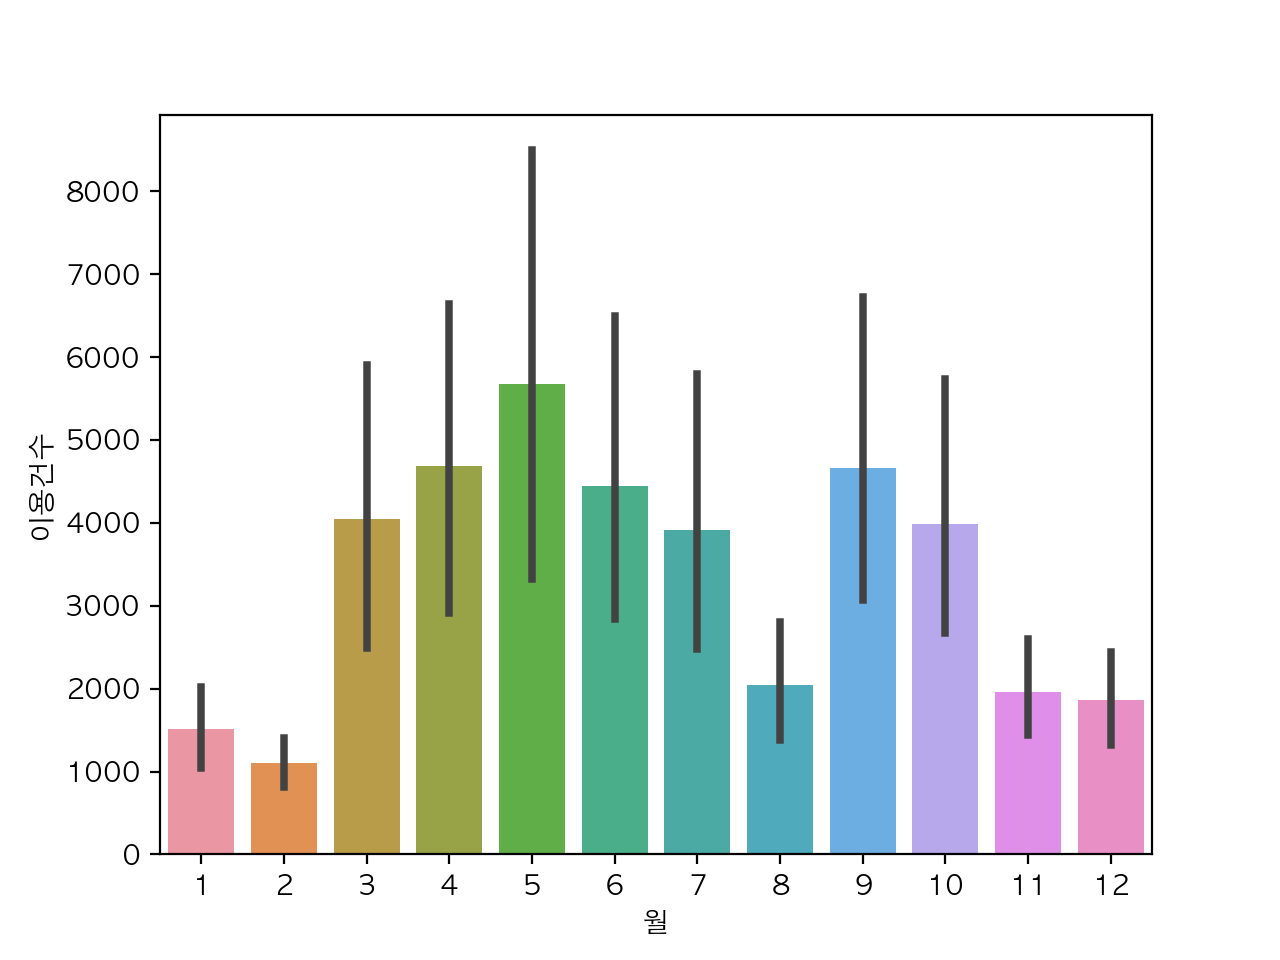

<AxesSubplot:xlabel='월', ylabel='이용건수'>

In [8]:
sns.barplot(x='월',y='이용건수',data=df_place_month)

In [23]:
# 대여시간별 이용건수 합계
time_counts = df_hanriver.groupby('대여시간',as_index=False).sum().sort_values(by='이용건수',ascending=False)
time_counts.reset_index(drop=True, inplace=True)
time_counts

,대여시간,년,월,일,대여소번호,이용건수,이동거리,사용시간
0,18,89120415,297119,702992,39784687,85009,3.971957e+08,3662734
1,17,87874161,293144,700192,37566197,82516,3.479044e+08,3831910
2,19,73851158,247142,578213,34059326,70067,2.809135e+08,3268998
3,16,73968645,245004,589201,32812120,65624,3.179185e+08,3419278
4,20,66914507,227181,526103,31076986,65060,2.749513e+08,3073614
5,21,62708880,214265,492018,28294965,61218,3.309898e+08,2714455
6,15,64812072,213251,514295,29136554,54481,2.469591e+08,3002229
7,22,51178582,174016,405273,22626989,48718,1.936518e+08,1990550
8,14,56536068,186075,448867,25116420,44108,2.049876e+08,2405105
9,13,49833511,166161,392994,21647341,35268,1.271083e+08,1768006


<IPython.core.display.Javascript object>


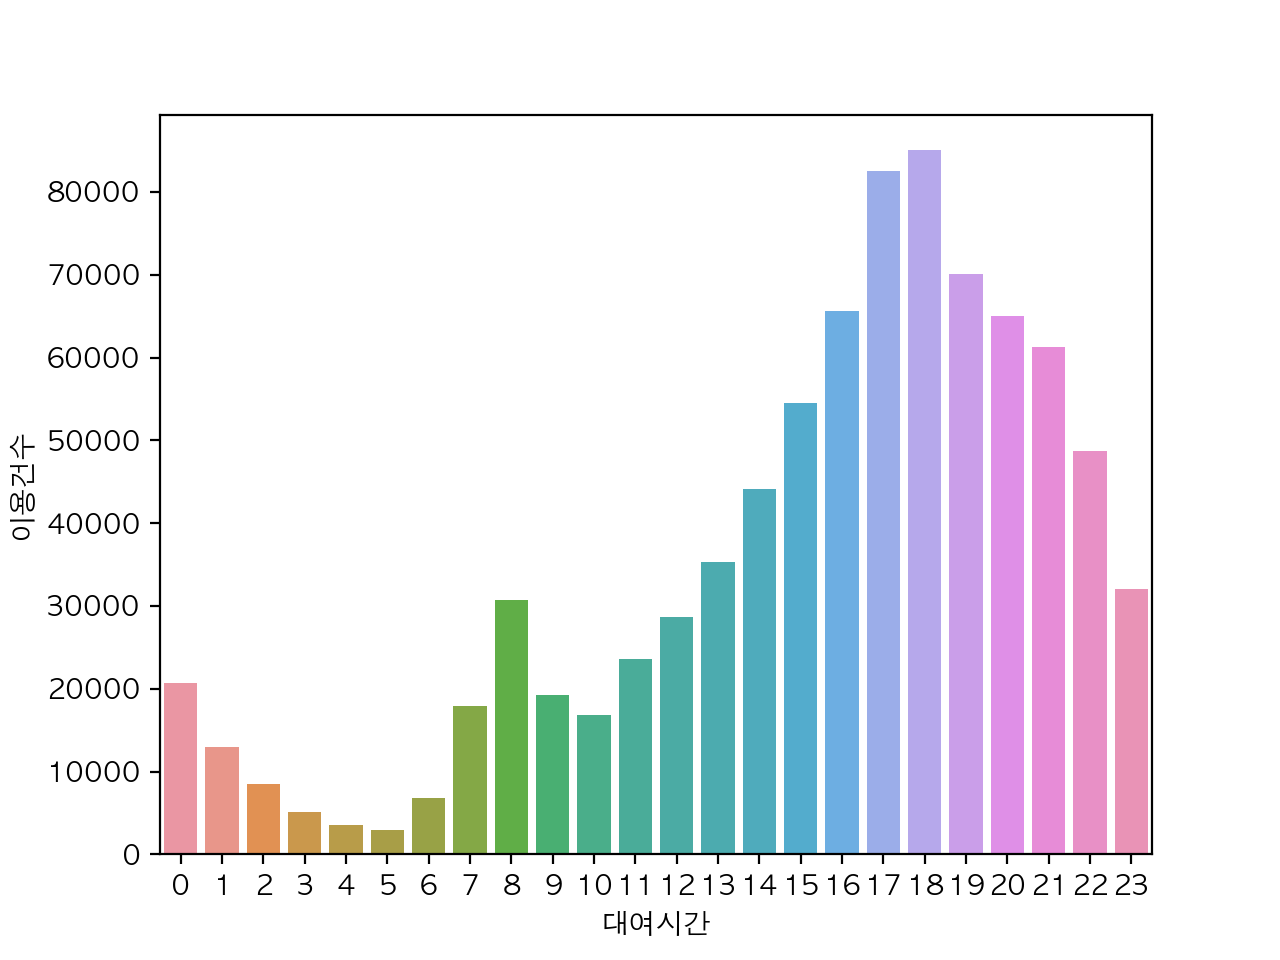

<AxesSubplot:xlabel='대여시간', ylabel='이용건수'>

In [24]:
sns.barplot(x='대여시간',y='이용건수',data=time_counts)

<IPython.core.display.Javascript object>


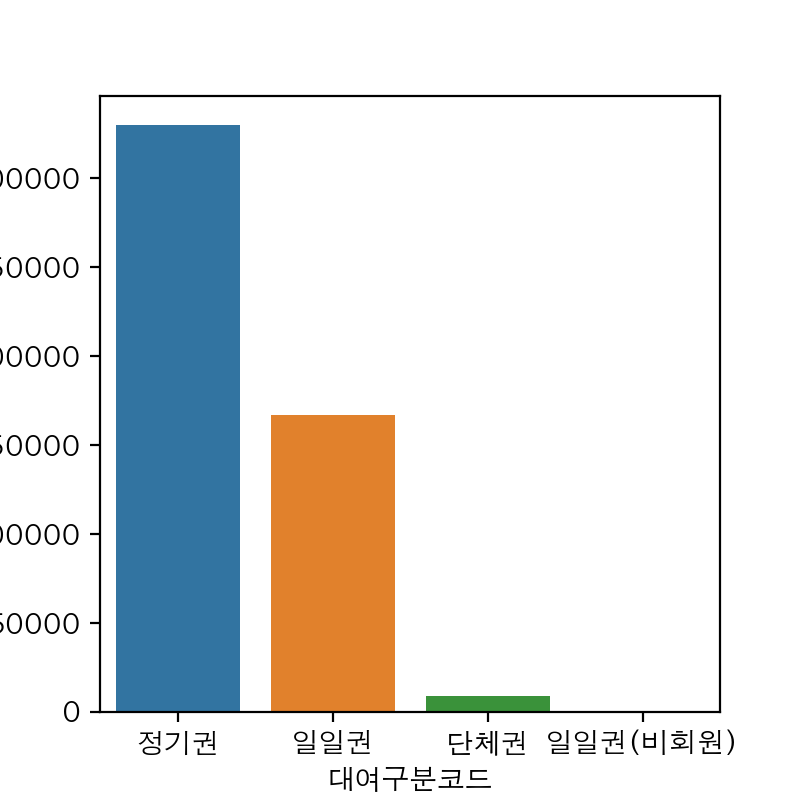

<AxesSubplot:xlabel='대여구분코드', ylabel='count'>

In [28]:
# 일일사용자 vs 정기사용자
plt.figure(figsize=(4,4))
sns.countplot(data=df_hanriver, x='대여구분코드')

<IPython.core.display.Javascript object>


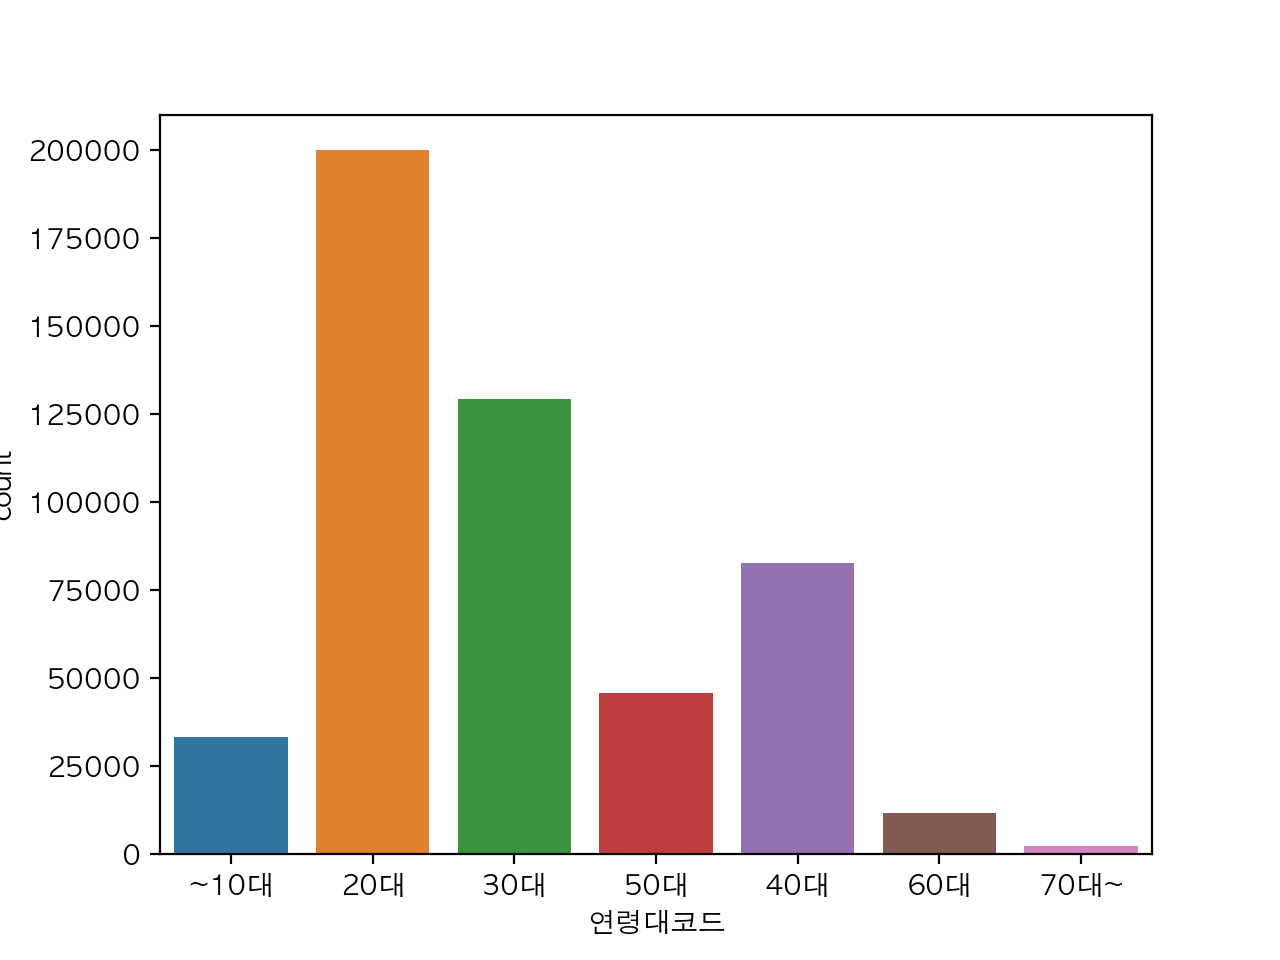

<AxesSubplot:xlabel='연령대코드', ylabel='count'>

In [29]:
# 일일사용자 vs 정기사용자
sns.countplot(data=df_hanriver, x='연령대코드')

In [9]:
df_hanriver['요일']= df_hanriver['대여일자'].dt.dayofweek
df_hanriver

,대여일자,년,월,일,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,요일
0,2019-12-01,2019,12,1,0,2219,"고속터미널역 8-1번, 8-2번 출구 사이",정기권,~10대,1,200.34,1.73,7440.00,47,6
1,2019-12-01,2019,12,1,0,1268,몽촌토성역 1번출구 옆,정기권,20대,1,39.47,0.41,1780.00,16,6
2,2019-12-01,2019,12,1,0,1009,천호역4번출구(현대백화점),정기권,20대,2,347.37,2.39,10320.00,61,6
3,2019-12-01,2019,12,1,0,204,국회의사당역 5번출구 옆,정기권,20대,1,110.42,1.00,4290.00,19,6
4,2019-12-01,2019,12,1,0,207,여의나루역 1번출구 앞,정기권,20대,1,0.00,0.00,0.00,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505227,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,~10대,1,0.00,0.00,0.00,43,6
505228,2021-01-31,2021,1,31,23,152,마포구민체육센터 앞,일일권,20대,1,114.94,1.50,6450.00,43,6
505229,2021-01-31,2021,1,31,23,4619,한강트럼프월드3차 앞,일일권,20대,2,282.84,4.11,17707.58,138,6
505230,2021-01-31,2021,1,31,23,207,여의나루역 1번출구 앞,일일권,30대,1,250.30,1.61,6945.89,38,6


In [10]:
# 이용건수 대비 사용시간 구하기
df_place_count = df_hanriver.groupby(['대여소명'],as_index=False).sum().sort_values(by='이용건수',ascending=False)
df_place_count.reset_index(drop=True,inplace=True)
df_place_count

,대여소명,년,월,일,대여시간,대여소번호,이용건수,이동거리,사용시간,요일
0,뚝섬유원지역 1번출구 앞,114544240,382242,910465,841254,28465910,137466,5.903380e+08,6505079,180470
1,여의나루역 1번출구 앞,106933010,353194,845175,768524,10957959,127847,6.269426e+08,6738493,162552
2,마포구민체육센터 앞,95429125,321647,758575,697353,7180784,87636,3.601636e+08,4204979,153152
3,"고속터미널역 8-1번, 8-2번 출구 사이",78672680,255708,622037,597703,86423393,68645,3.490173e+08,3634134,124890
4,노들역 1번출구,61603852,197350,483163,442863,61054994,46488,2.203209e+08,2228300,95771
5,천호역4번출구(현대백화점),64067892,216690,506118,454458,32002453,44617,1.403422e+08,1313051,97801
6,선유도역 3번출구 앞,61911083,211527,491282,450777,6987972,42546,9.706523e+07,1524838,94314
7,몽촌토성역 1번출구 옆,54269407,182935,425216,401052,34066088,38547,1.323586e+08,1489050,88224
8,아크로리버뷰 부지 앞,45985339,156429,363289,338457,50470005,33064,1.639238e+08,1760112,74190
9,여의도역 4번출구 옆,50386559,173600,396087,353339,5263184,32913,1.005512e+08,980937,69191


In [11]:
df_place_count['사용시간평균'] = df_place_count['사용시간']/df_place_count['이용건수']
df_place_count

,대여소명,년,월,일,대여시간,대여소번호,이용건수,이동거리,사용시간,요일,사용시간평균
0,뚝섬유원지역 1번출구 앞,114544240,382242,910465,841254,28465910,137466,5.903380e+08,6505079,180470,47.321367
1,여의나루역 1번출구 앞,106933010,353194,845175,768524,10957959,127847,6.269426e+08,6738493,162552,52.707478
2,마포구민체육센터 앞,95429125,321647,758575,697353,7180784,87636,3.601636e+08,4204979,153152,47.982325
3,"고속터미널역 8-1번, 8-2번 출구 사이",78672680,255708,622037,597703,86423393,68645,3.490173e+08,3634134,124890,52.940986
4,노들역 1번출구,61603852,197350,483163,442863,61054994,46488,2.203209e+08,2228300,95771,47.932800
5,천호역4번출구(현대백화점),64067892,216690,506118,454458,32002453,44617,1.403422e+08,1313051,97801,29.429388
6,선유도역 3번출구 앞,61911083,211527,491282,450777,6987972,42546,9.706523e+07,1524838,94314,35.839750
7,몽촌토성역 1번출구 옆,54269407,182935,425216,401052,34066088,38547,1.323586e+08,1489050,88224,38.629465
8,아크로리버뷰 부지 앞,45985339,156429,363289,338457,50470005,33064,1.639238e+08,1760112,74190,53.233487
9,여의도역 4번출구 옆,50386559,173600,396087,353339,5263184,32913,1.005512e+08,980937,69191,29.803938


In [17]:
df_place_count['사용시간평균'].mean()

41.26631029265608

<IPython.core.display.Javascript object>


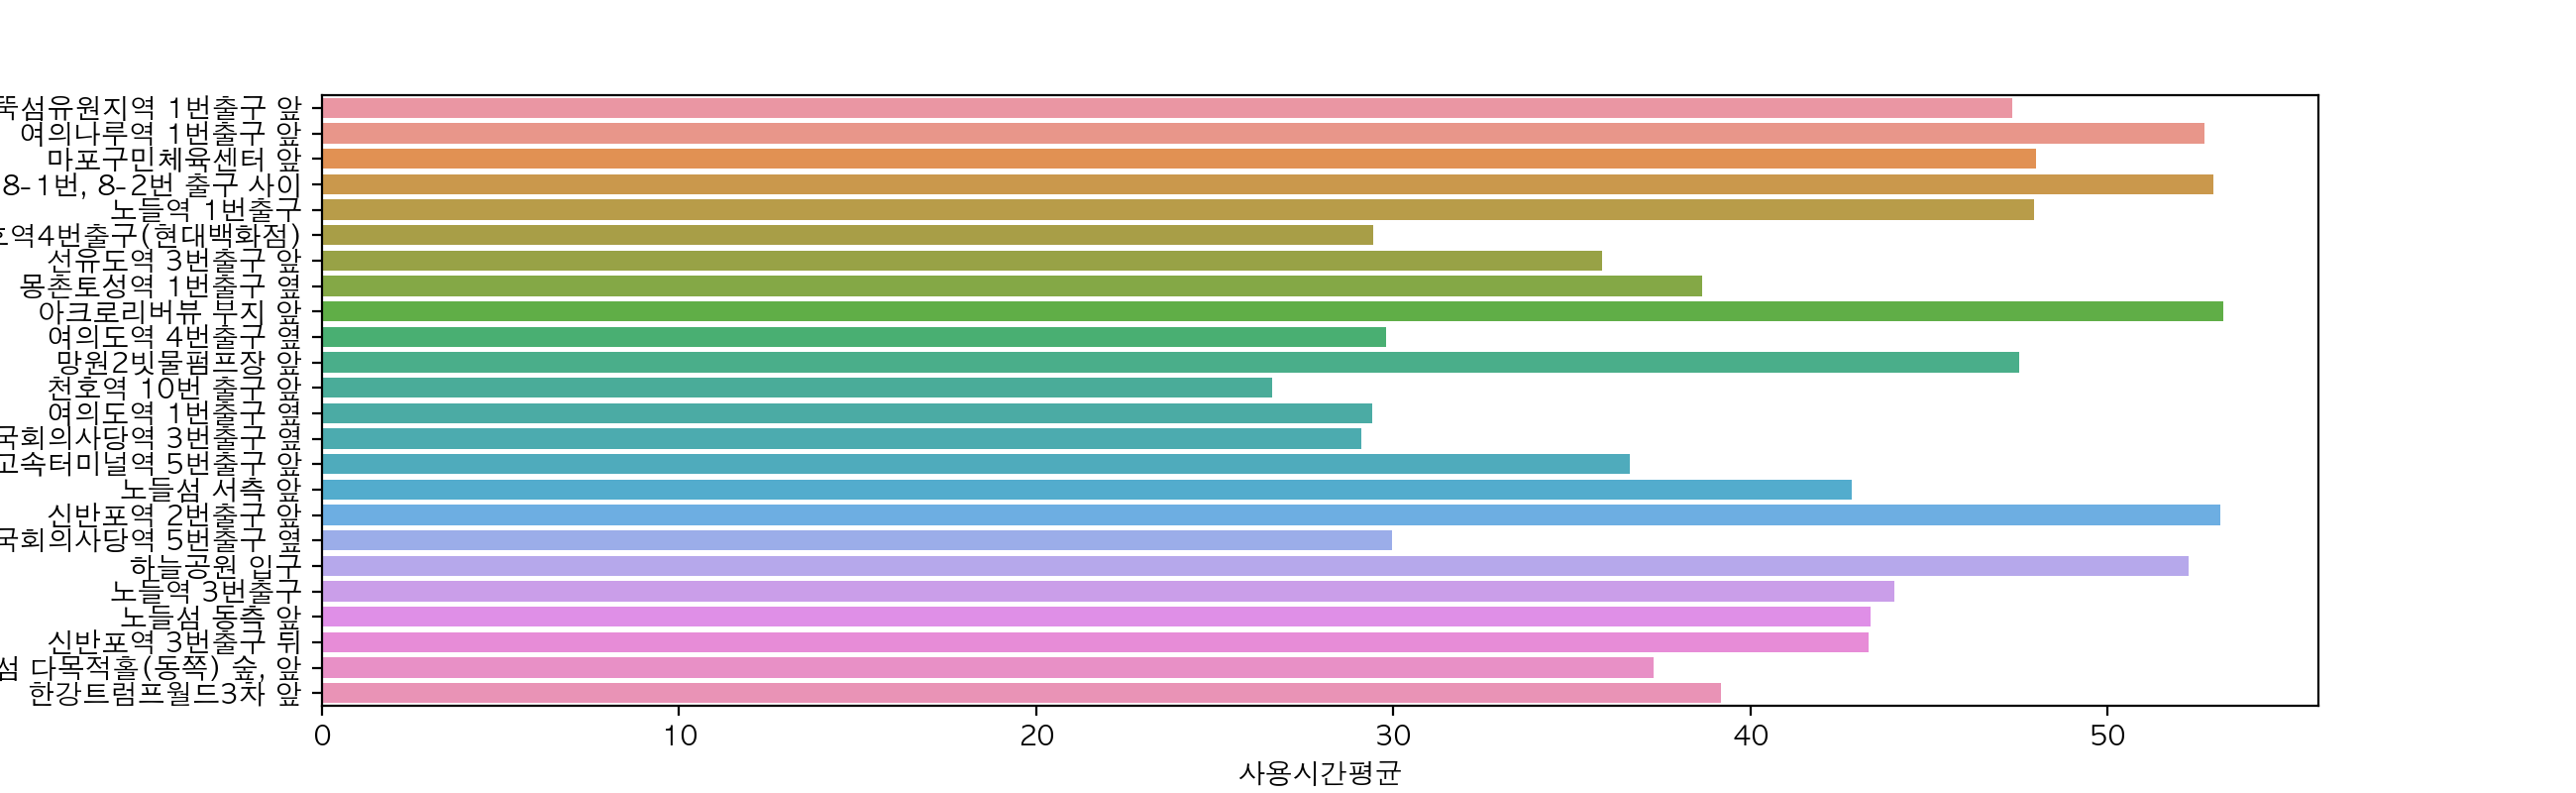

<AxesSubplot:xlabel='사용시간평균', ylabel='대여소명'>

In [78]:
plt.figure(figsize=(13,4))
sns.barplot(x='사용시간평균',y='대여소명',data=df_place_count)

<IPython.core.display.Javascript object>


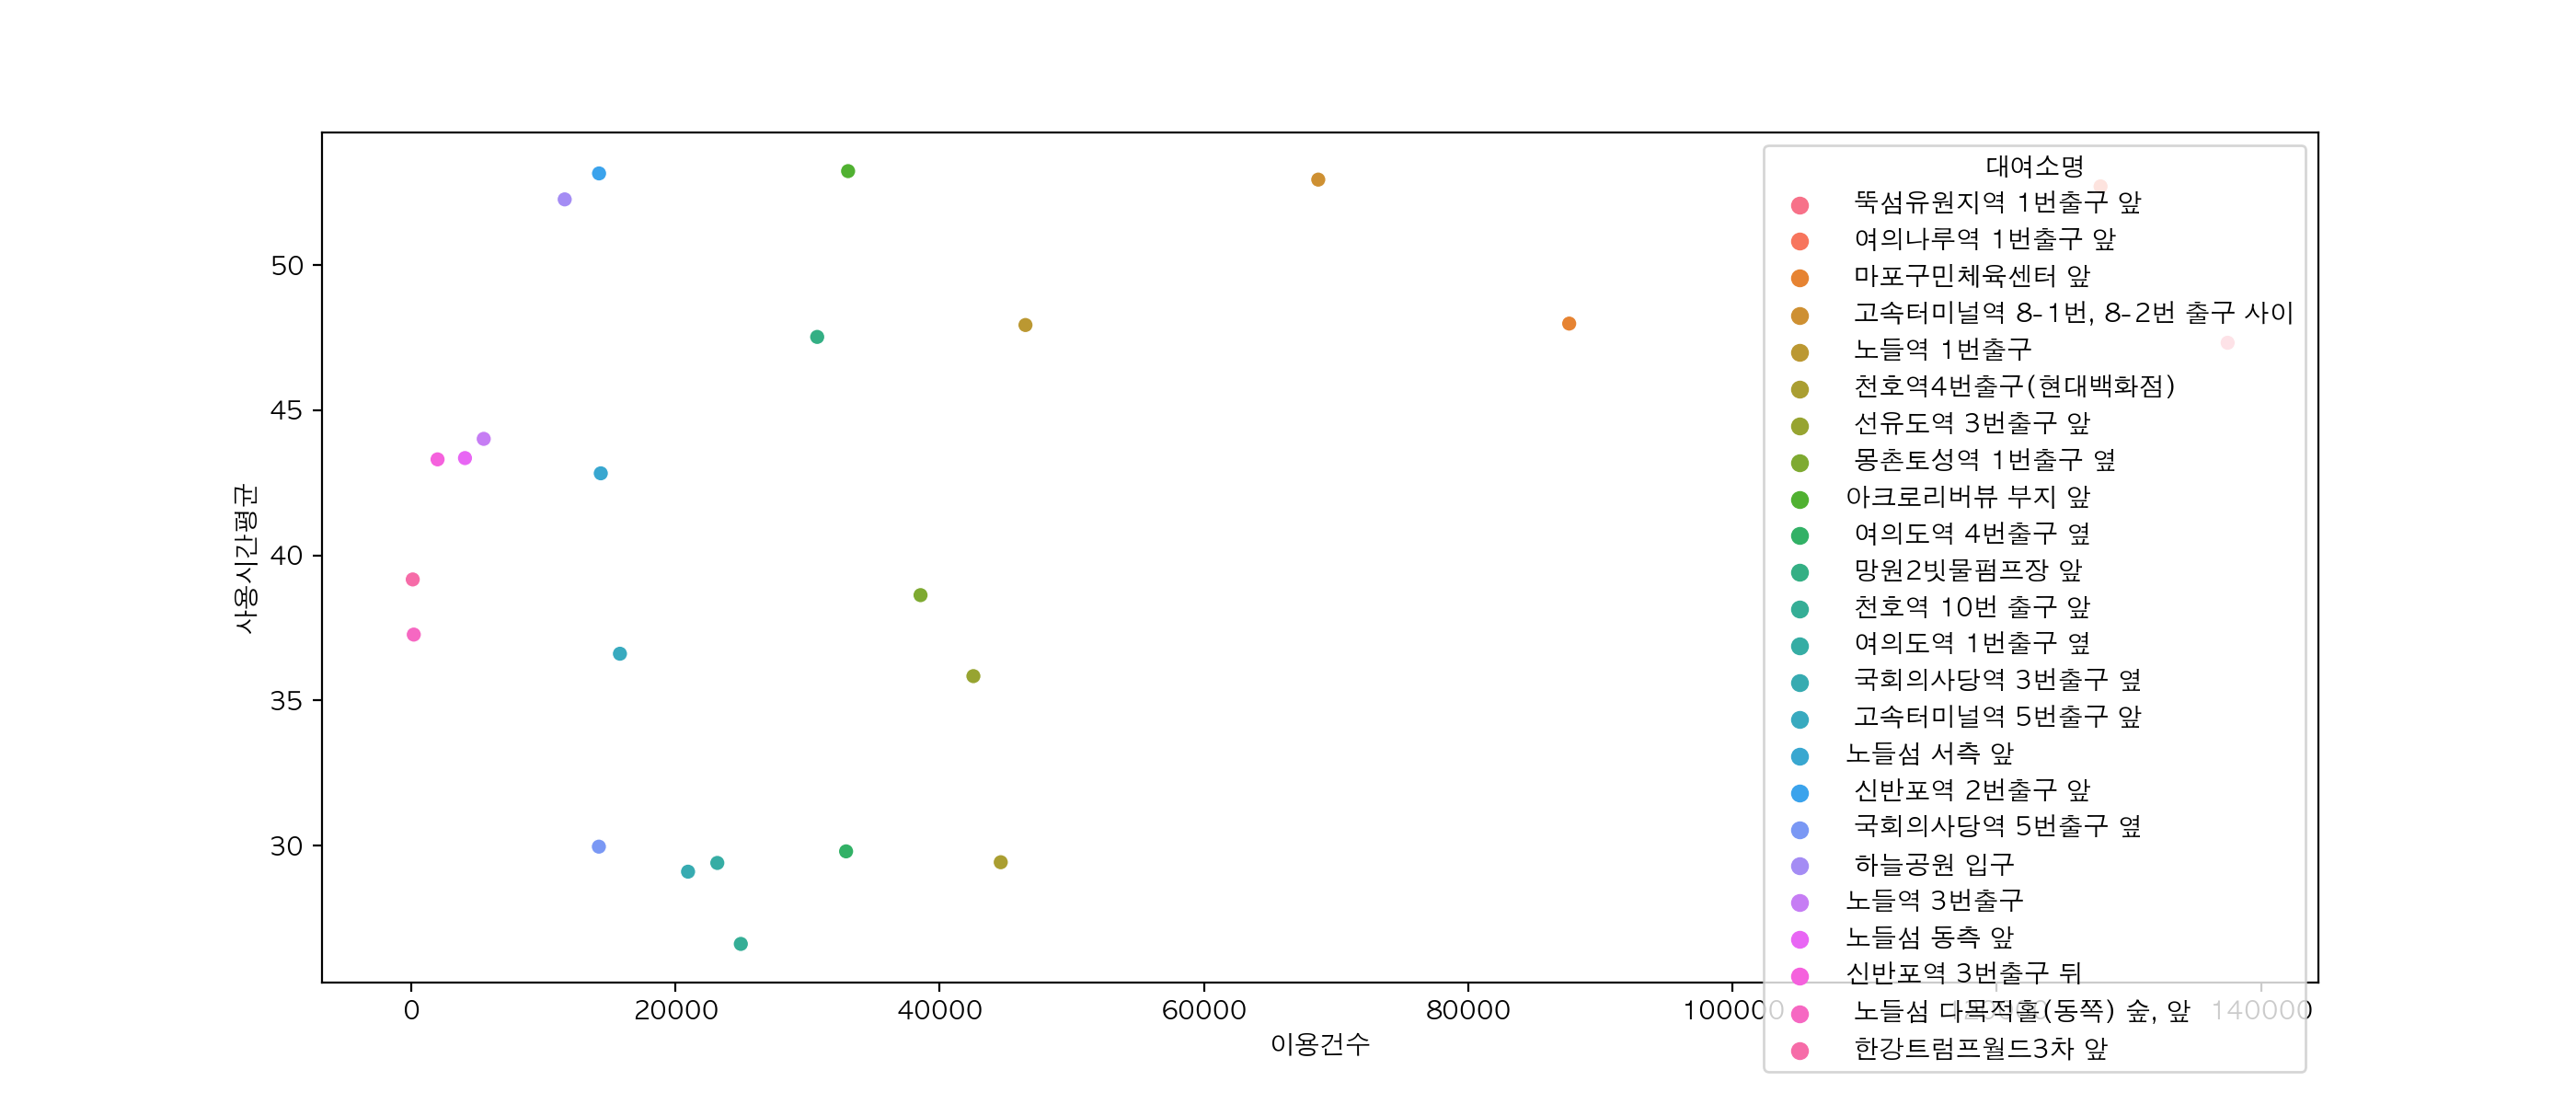

<AxesSubplot:xlabel='이용건수', ylabel='사용시간평균'>

In [14]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='이용건수',y='사용시간평균',hue='대여소명',data=df_place_count)

In [15]:
df_place_count.corr()

,년,월,일,대여시간,대여소번호,이용건수,이동거리,사용시간,요일,사용시간평균
년,1.000000,0.999105,0.999963,0.999165,0.413343,0.960464,0.922404,0.922215,0.996693,0.244023
월,0.999105,1.000000,0.999244,0.998150,0.396426,0.958590,0.916065,0.917583,0.995587,0.228918
일,0.999963,0.999244,1.000000,0.999249,0.410615,0.961497,0.923165,0.923455,0.996922,0.245404
대여시간,0.999165,0.998150,0.999249,1.000000,0.427497,0.961379,0.924909,0.926366,0.998489,0.268339
대여소번호,0.413343,0.396426,0.410615,0.427497,1.000000,0.318795,0.367653,0.335093,0.430657,0.354600
이용건수,0.960464,0.958590,0.961497,0.961379,0.318795,1.000000,0.983337,0.986775,0.961209,0.337609
이동거리,0.922404,0.916065,0.923165,0.924909,0.367653,0.983337,1.000000,0.995135,0.925433,0.437310
사용시간,0.922215,0.917583,0.923455,0.926366,0.335093,0.986775,0.995135,1.000000,0.929211,0.461285
요일,0.996693,0.995587,0.996922,0.998489,0.430657,0.961209,0.925433,0.929211,1.000000,0.300228
사용시간평균,0.244023,0.228918,0.245404,0.268339,0.354600,0.337609,0.437310,0.461285,0.300228,1.000000
